In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pformat

# Prétraitement des données
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Modèles
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Évaluation des modèles
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from scipy.stats import spearmanr

# Validation croisée et recherche de modèle
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold

In [2]:
raw_data_x = pd.read_csv("data/Data_X.csv", index_col='ID')
raw_dataNew_x = pd.read_csv("data/DataNew_X.csv", index_col='ID')
raw_data_y = pd.read_csv("data/Data_Y.csv", index_col='ID')

In [3]:
data_xy = pd.merge(raw_data_x, raw_data_y, on='ID').copy()

In [4]:
data_fr = data_xy.drop('COUNTRY', axis=1).copy()

In [5]:
X = data_fr.drop('TARGET', axis=1)
y = data_fr['TARGET']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', RobustScaler()),
    ('model', Lasso())
])

param_grid = {
    'imputer__strategy': ['mean', 'median', 'constant'],
    'imputer__fill_value': [None],
    
    # 'imputer__strategy': ['mean', 'median', 'constante'],
    # 'imputer_fill_value': [None],
    'model__alpha': np.logspace(-3, 3).tolist()
}

GS = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='r2', verbose=1)
GS.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', RobustScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'imputer__fill_value': [None],
                         'imputer__strategy': ['mean', 'median', 'constant'],
                         'model__alpha': [0.001, 0.0013257113655901094,
                                          0.0017575106248547913,
                                          0.002329951810515372,
                                          0.0030888435964774815,
                                          0.004094915062380427,
                                          0.00542...
                                          0.03906939937054617,
                                          0.0517947467923121,
                                          0.06866488450043001,
                                          0.09102981779915217,
           

In [8]:
cv_res = GS.cv_results_
cv_res.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_imputer__fill_value', 'param_imputer__strategy', 'param_model__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [12]:
cv_results_df = pd.DataFrame(GS.cv_results_)

In [13]:
display(cv_res['mean_test_score'].shape)
display(cv_res['rank_test_score'].shape)
display(cv_res['std_test_score'].shape)


(150,)

(150,)

(150,)

<AxesSubplot:>

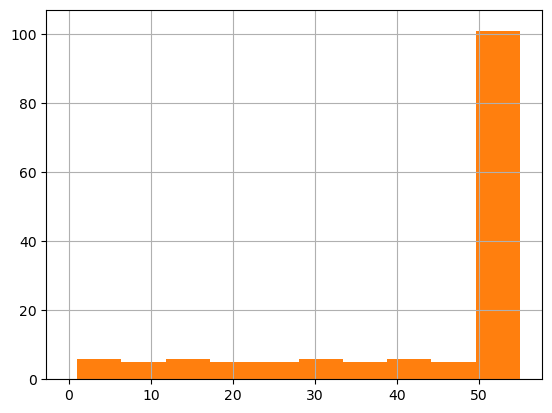

In [15]:
cv_results_df['mean_test_score'].hist()
cv_results_df['rank_test_score'].hist()
cv_results_df['std_test_score'].hist()

<AxesSubplot:>

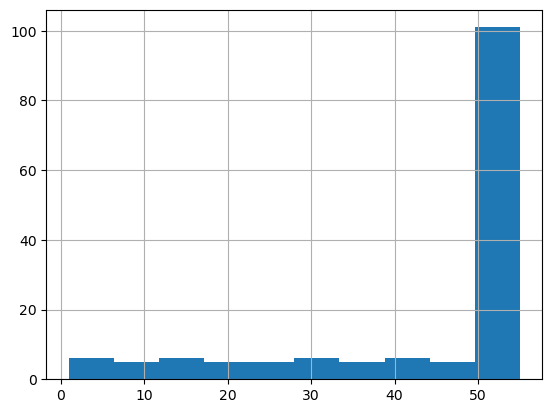

In [13]:
cv_results_df['rank_test_score'].hist()

<AxesSubplot:>

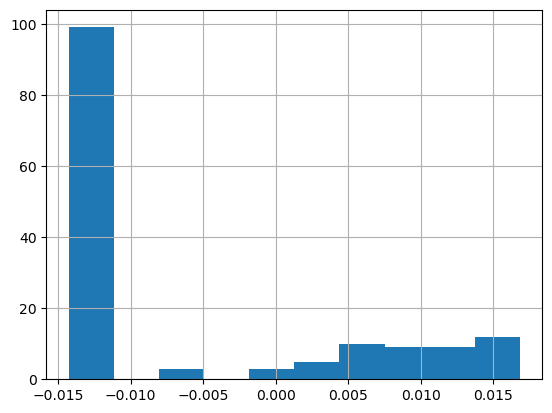

In [12]:
cv_results_df['mean_test_score'].hist()